In [1]:
import numpy as np
import pandas as pd
import datatable
import itertools as it
from owlready2 import *
import math
import joblib

import pickle
from sklearn.utils import parallel_backend

#para depurar los que letras que no están en el codigo ascii
import unicodedata
import functools
import spacy
import stanfordnlp
#from spacy_stanfordnlp import StanfordNLPLanguage
from sklearn.decomposition import LatentDirichletAllocation
from sklearn import metrics
#from wiki_dump_reader import Cleaner, iterate
from sklearn.decomposition import TruncatedSVD

from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import pairwise_distances

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import chi2
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import normalize,scale

#from gensim.models import CoherenceModel, LdaModel, LsiModel, HdpModel
#from gensim.models.wrappers import LdaMallet
#from gensim.corpora import Dictionary

#import pyLDAvis
#import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

from IPython.display import SVG

import random
from sklearn.externals import joblib


#Operaciones con gráficos
import scattertext as st
from matplotlib import pyplot as plt
from matplotlib.ticker import MaxNLocator

import networkx as nx

import bokeh.plotting as bp
from bokeh.models import HoverTool, BoxSelectTool, LabelSet, ColumnDataSource, Range1d
from bokeh.plotting import figure, show, output_notebook
from sklearn.manifold import TSNE

#import gensim
#import gensim.corpora as corpora
#from gensim.models import CoherenceModel
#from gensim.models import HdpModel

warnings.filterwarnings("ignore")

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from multiprocessing import  Pool
import math
import scipy.sparse as sp
from bayes_opt import BayesianOptimization

import vectorizer
import vectorizer 
importlib.reload(vectorizer)
from vectorizer import  WeightedTfidfVectorizer
from sklearn.svm import SVC
from sklearn.model_selection import *
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
import  h2o

In [3]:
from h2o.estimators import H2OXGBoostEstimator, H2ODeepLearningEstimator,H2ORandomForestEstimator,H2OSupportVectorMachineEstimator

In [4]:

h2o.init(max_mem_size='14G')

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O cluster uptime:,10 mins 20 secs
H2O cluster timezone:,Europe/Berlin
H2O data parsing timezone:,UTC
H2O cluster version:,3.28.0.3
H2O cluster version age:,7 months and 7 days !!!
H2O cluster name:,H2O_from_python_rdelaguila_r4cphj
H2O cluster total nodes:,1
H2O cluster free memory:,13.99 Gb
H2O cluster total cores:,12
H2O cluster allowed cores:,12
H2O cluster status:,"locked, healthy"


In [71]:
from hyperopt import fmin, tpe, hp,Trials

def xgb_cv(space):
    """SVC cross validation.
    This function will instantiate a SVC classifier with parameters C and
    gamma. Combined with data and targets this will in turn be used to perform
    cross validation. The result of cross validation is returned.
    Our goal is to find combinations of C and gamma that maximizes the roc_auc
    metric.
    """
    params = {'max_depth': int(space['max_depth']), 'ntrees': int(space['ntrees']),'min_rows':int(space['min_rows']),'eta':float(space['eta']),
              'learn_rate':float(space['learn_rate']),'sample_rate':float(space['sample_rate']),
              'colsample_bytree':float(space['colsample_bytree']),'reg_lambda':float(space['reg_lambda']),'reg_alpha':float(space['reg_alpha'])}
      
    estimator = H2OXGBoostEstimator(**params,nfolds=10)
    estimator.train(x=vocab,y='target',training_frame=train)
    return estimator.logloss()

def optimize_xgb():
    """Apply Bayesian Optimization to XGB parameters."""
    
    trials = Trials()
    space={"max_depth": hp.uniform('max_depth',4, 40), "ntrees": hp.uniform('x_ntrees',50,400),'min_rows':hp.uniform('x_min_rows',2,50),'eta':hp.uniform('x_eta',0.01,1),
                 'learn_rate':hp.uniform('x_learn_rate',0.01,1),'sample_rate':hp.uniform('x_sample_rate',0.1,0.5),'colsample_bytree':hp.uniform('x_colsample_bytree',0.2,0.8),
                 'reg_lambda':hp.uniform('x_reg_lambda',0,1),'reg_alpha':hp.uniform('x_reg_alpha',0,1)}
    best = fmin(fn=xgb_cv,
            space=space,
            algo=tpe.suggest,
            max_evals=10,
            trials=trials)

    print("Final result:", best)
    


In [72]:
from hyperopt import fmin, tpe, hp,Trials

def svm_cv(space):
    """SVC cross validation.
    This function will instantiate a SVC classifier with parameters C and
    gamma. Combined with data and targets this will in turn be used to perform
    cross validation. The result of cross validation is returned.
    Our goal is to find combinations of C and gamma that maximizes the roc_auc
    metric.
    """
    params = {'gamma': float(space['gamma'])}
      
    estimator = H2OSupportVectorMachineEstimator(**params,max_iterations=400)
    estimator.train(x=vocab,y='target',training_frame=train)
    return estimator.logloss()

def optimize_svm():
    """Apply Bayesian Optimization to XGB parameters."""
    
    trials = Trials()
    space={"gamma": hp.uniform('x_gamma',0,1),}
    best = fmin(fn=svm_cv,
            space=space,
            algo=tpe.suggest,
            max_evals=10,
            trials=trials)

    print("Final result:", best)

In [73]:
list((12,12))

[12, 12]

In [74]:
from hyperopt import fmin, tpe, hp,Trials

def rf_cv(space):
    """SVC cross validation.
    This function will instantiate a SVC classifier with parameters C and
    gamma. Combined with data and targets this will in turn be used to perform
    cross validation. The result of cross validation is returned.
    Our goal is to find combinations of C and gamma that maximizes the roc_auc
    metric.
    """
    params = {'max_depth': int(space['max_depth']), 
              'ntrees': int(space['ntrees']),'min_rows':int(space['min_rows']),
              'sample_rate':float(space['sample_rate'])}
      
    estimator = H2ORandomForestEstimator(**params,nfolds=10)
    estimator.train(x=vocab,y='target',training_frame=train,validation_frame=test)
    return estimator.logloss()

def optimize_rf():
    """Apply Bayesian Optimization to XGB parameters."""
    
    trials = Trials()
    space={"max_depth": hp.uniform('max_depth',4, 40), 
           "ntrees": hp.uniform('x_ntrees',50,400),
           'min_rows':hp.uniform('x_min_rows',2,50),
           'sample_rate':hp.uniform('x_sample_rate',0.1,0.5)}
    best = fmin(fn=rf_cv,
            space=space,
            algo=tpe.suggest,
            max_evals=10,
            trials=trials)

    print("Final result:", best)

In [92]:
import joblib
vocab=joblib.load('../objects/20newsgroup/vocab.dtm.final')
newdtm =joblib.load('../objects/20newsgroup/newdtm.final')
corpusnormalizado = joblib.load('../data/processed/20newsgroup/corpus_normalizado.final')
dtm = newdtm.todense()
dtm_scaled = scale(dtm)

In [93]:
dtm_scaled = pd.DataFrame(data=dtm_scaled, columns=vocab) ##revisar que está bien generado, si no ir al paso anterior

In [94]:
dtm_scaled['target']=corpusnormalizado.iloc[:,1]


In [95]:
dtm_scaled.head()

,read,24,service,numb,ask,dept,question,news,support,17,...,great,lot,talk,little,happen,claim,doesn,opinion,leave,target
0,-0.310885,-0.224645,-0.227452,-0.245103,-0.290876,-0.209903,-0.332306,-0.297651,-0.254025,-0.239241,...,-0.277919,5.889076,-0.249082,-0.275675,-0.262523,-0.223794,-0.298326,-0.27425,-0.260799,1.0
1,-0.310885,-0.224645,-0.227452,-0.245103,-0.290876,-0.209903,-0.332306,-0.297651,2.721457,-0.239241,...,-0.277919,-0.293101,-0.249082,-0.275675,-0.262523,-0.223794,-0.298326,-0.27425,-0.260799,1.0
2,-0.310885,-0.224645,-0.227452,-0.245103,-0.290876,1.791602,-0.332306,-0.297651,-0.254025,-0.239241,...,4.392435,-0.293101,3.137025,-0.275675,-0.262523,-0.223794,-0.298326,-0.27425,-0.260799,0.0
3,-0.310885,-0.224645,-0.227452,-0.245103,-0.290876,-0.209903,-0.332306,-0.297651,-0.254025,-0.239241,...,-0.277919,-0.293101,0.846980,-0.275675,-0.262523,-0.223794,0.719420,-0.27425,-0.260799,1.0
4,-0.310885,-0.224645,-0.227452,-0.245103,-0.290876,-0.209903,1.677027,-0.297651,-0.254025,-0.239241,...,-0.277919,-0.293101,-0.249082,-0.275675,-0.262523,-0.223794,-0.298326,-0.27425,-0.260799,1.0


In [96]:
corpusnormalizado.head()

,cleaned_text,new_target
0,organization post office carnegie mellon pittsburgh pa line 12 nnt...,1.0
1,summary seek recommendation vlb video card nntp post host midway.e...,1.0
2,line 95 nntp post host viktoria.dsv.su.se organization dept comput...,0.0
3,originator guyd pal500.austin.ibm.com organization ibm austin line...,1.0
4,organization sophomore mechanical engineer carnegie mellon pittsbu...,1.0


In [97]:
dtm_scaled.to_csv('../data/interim/20newsgroup/weighteddtmscaled.csv')
dtm_scaled.head()

,read,24,service,numb,ask,dept,question,news,support,17,...,great,lot,talk,little,happen,claim,doesn,opinion,leave,target
0,-0.310885,-0.224645,-0.227452,-0.245103,-0.290876,-0.209903,-0.332306,-0.297651,-0.254025,-0.239241,...,-0.277919,5.889076,-0.249082,-0.275675,-0.262523,-0.223794,-0.298326,-0.27425,-0.260799,1.0
1,-0.310885,-0.224645,-0.227452,-0.245103,-0.290876,-0.209903,-0.332306,-0.297651,2.721457,-0.239241,...,-0.277919,-0.293101,-0.249082,-0.275675,-0.262523,-0.223794,-0.298326,-0.27425,-0.260799,1.0
2,-0.310885,-0.224645,-0.227452,-0.245103,-0.290876,1.791602,-0.332306,-0.297651,-0.254025,-0.239241,...,4.392435,-0.293101,3.137025,-0.275675,-0.262523,-0.223794,-0.298326,-0.27425,-0.260799,0.0
3,-0.310885,-0.224645,-0.227452,-0.245103,-0.290876,-0.209903,-0.332306,-0.297651,-0.254025,-0.239241,...,-0.277919,-0.293101,0.846980,-0.275675,-0.262523,-0.223794,0.719420,-0.27425,-0.260799,1.0
4,-0.310885,-0.224645,-0.227452,-0.245103,-0.290876,-0.209903,1.677027,-0.297651,-0.254025,-0.239241,...,-0.277919,-0.293101,-0.249082,-0.275675,-0.262523,-0.223794,-0.298326,-0.27425,-0.260799,1.0


In [98]:
frame = h2o.upload_file('../data/interim/20newsgroup/weighteddtmscaled.csv',sep=',',header=1)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [99]:
frame = frame.drop('C1')

In [100]:
frame['target']=frame['target'].asfactor()
train,test=frame.split_frame(ratios=[.75])

In [118]:
frame.shape

(18846, 201)

0.7641409317627083

In [101]:

optimize_xgb()

xgboost Model Build progress: |                       
█                                                     
█                                                     
█                                                     
█                                                     
█                                                     
█                                                     
█                                                     
█                                                     
█                                                     
█                                                     
█                                                     
█                                                     
█                                                     
█                                                     
█                                                     
█                                                     
█                                                     
█         

In [102]:
params= {'colsample_bytree': 0.655, 'eta': 0.776, 'learn_rate': 0.88, 'max_depth': 25, 'min_rows': 3, 'ntrees': 298, 'reg_alpha': 0.24, 'reg_lambda': 0.7, 'sample_rate': 0.344}

train

In [103]:
model = H2OXGBoostEstimator(**params,seed=123)

In [104]:
model.train(x=vocab,y='target',training_frame=train)

xgboost Model Build progress: |███████████████████████████████████████████| 100%


In [105]:
performance = model.model_performance(test)

In [106]:
performance


ModelMetricsMultinomial: xgboost
** Reported on test data. **

MSE: 0.1808733781820403
RMSE: 0.425292109240273
LogLoss: 0.8309084006160609
Mean Per-Class Error: 0.4144868434317665

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class


,0,1,2,Error,Rate
0,1253.0,448.0,27.0,0.274884,"475 / 1,728"
1,406.0,2419.0,28.0,0.152121,"434 / 2,853"
2,30.0,99.0,29.0,0.816456,129 / 158
3,1689.0,2966.0,84.0,0.219034,"1,038 / 4,739"



Top-3 Hit Ratios: 


,k,hit_ratio
0,1,0.780966
1,2,0.962650
2,3,1.000000


In [107]:
model.save_mojo('../objects/20newsgroup/modelo_xgb_3class')


'/mnt/c/Users/Raúl/Documents/Doctorado/curso NLP/FINAL-NLP-COURSE/FINAL_NLP_COURSE/Scripts Phd/oboe/objects/20newsgroup/modelo_xgb_3class/XGBoost_model_python_1594800800082_4935.zip'

In [109]:
optimize_rf()

drf Model Build progress: |                           
█                                                     
█                                                     
█                                                     
█                                                     
█                                                     
█                                                     
█                                                     
█                                                     
█                                                     
█                                                     
█                                                     
█                                                     
█                                                     
█                                                     
█                                                     
█                                                     
█                                                     
█         

In [110]:
params = {'max_depth':25,'min_rows':2,'ntrees':141,'sample_rate':0.417}
rfmodel = H2ORandomForestEstimator(**params,seed=123)


In [111]:
rfmodel.train(x=vocab,y='target',training_frame=train)

drf Model Build progress: |███████████████████████████████████████████████| 100%


In [112]:
performance2 = rfmodel.model_performance(test)

In [113]:
performance2


ModelMetricsMultinomial: drf
** Reported on test data. **

MSE: 0.17112821143506943
RMSE: 0.41367645743390985
LogLoss: 0.5428082000085279
Mean Per-Class Error: 0.45407889941646046

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class


,0,1,2,Error,Rate
0,1129.0,592.0,7.0,0.346644,"599 / 1,728"
1,207.0,2646.0,0.0,0.072555,"207 / 2,853"
2,19.0,130.0,9.0,0.943038,149 / 158
3,1355.0,3368.0,16.0,0.201519,"955 / 4,739"



Top-3 Hit Ratios: 


,k,hit_ratio
0,1,0.798481
1,2,0.971091
2,3,1.000000


In [116]:
rfmodel.save_mojo('../objects/20newsgroup/rf_model_3class')

'/mnt/c/Users/Raúl/Documents/Doctorado/curso NLP/FINAL-NLP-COURSE/FINAL_NLP_COURSE/Scripts Phd/oboe/objects/20newsgroup/rf_model_3class/DRF_model_python_1594800800082_4953.zip'

## Corpus con target original

In [120]:
newdtm =joblib.load('../objects/20newsgroup/newdtmsinoutliers.final')
corpusnormalizado = joblib.load('../data/processed/20newsgroup/corpus_normalizado_sin_outliers.final')
dtm = newdtm.todense()
dtm_scaled = scale(dtm)

In [121]:
dtm_scaled = pd.DataFrame(data=dtm_scaled, columns=vocab) ##revisar que está bien generado, si no ir al paso anterior

In [122]:
corpusnormalizado.head()

,cleaned_text,Topic
0,organization post office carnegie mellon pittsburgh pa line 12 nnt...,1
1,summary seek recommendation vlb video card nntp post host midway.e...,1
2,line 95 nntp post host viktoria.dsv.su.se organization dept comput...,0
3,originator guyd pal500.austin.ibm.com organization ibm austin line...,1
4,organization sophomore mechanical engineer carnegie mellon pittsbu...,1


In [123]:
dtm_scaled['target']=corpusnormalizado.iloc[:,1]

In [124]:
dtm_scaled.head()

,read,24,service,numb,ask,dept,question,news,support,17,...,great,lot,talk,little,happen,claim,doesn,opinion,leave,target
0,-0.310883,-0.224645,-0.227476,-0.245143,-0.290845,-0.209919,-0.332330,-0.297618,-0.253975,-0.239238,...,-0.277866,5.889367,-0.249058,-0.275666,-0.2625,-0.223799,-0.298344,-0.274283,-0.260783,1
1,-0.310883,-0.224645,-0.227476,-0.245143,-0.290845,-0.209919,-0.332330,-0.297618,2.720929,-0.239238,...,-0.277866,-0.293116,-0.249058,-0.275666,-0.2625,-0.223799,-0.298344,-0.274283,-0.260783,1
2,-0.310883,-0.224645,-0.227476,-0.245143,-0.290845,1.791733,-0.332330,-0.297618,-0.253975,-0.239238,...,4.391607,-0.293116,3.136709,-0.275666,-0.2625,-0.223799,-0.298344,-0.274283,-0.260783,0
3,-0.310883,-0.224645,-0.227476,-0.245143,-0.290845,-0.209919,-0.332330,-0.297618,-0.253975,-0.239238,...,-0.277866,-0.293116,0.846893,-0.275666,-0.2625,-0.223799,0.719461,-0.274283,-0.260783,1
4,-0.310883,-0.224645,-0.227476,-0.245143,-0.290845,-0.209919,1.677149,-0.297618,-0.253975,-0.239238,...,-0.277866,-0.293116,-0.249058,-0.275666,-0.2625,-0.223799,-0.298344,-0.274283,-0.260783,1


In [125]:
corpusnormalizado.head()

,cleaned_text,Topic
0,organization post office carnegie mellon pittsburgh pa line 12 nnt...,1
1,summary seek recommendation vlb video card nntp post host midway.e...,1
2,line 95 nntp post host viktoria.dsv.su.se organization dept comput...,0
3,originator guyd pal500.austin.ibm.com organization ibm austin line...,1
4,organization sophomore mechanical engineer carnegie mellon pittsbu...,1


In [126]:
dtm_scaled.to_csv('../data/interim/20newsgroup/weighteddtmscaled.csv')
dtm_scaled.head()

,read,24,service,numb,ask,dept,question,news,support,17,...,great,lot,talk,little,happen,claim,doesn,opinion,leave,target
0,-0.310883,-0.224645,-0.227476,-0.245143,-0.290845,-0.209919,-0.332330,-0.297618,-0.253975,-0.239238,...,-0.277866,5.889367,-0.249058,-0.275666,-0.2625,-0.223799,-0.298344,-0.274283,-0.260783,1
1,-0.310883,-0.224645,-0.227476,-0.245143,-0.290845,-0.209919,-0.332330,-0.297618,2.720929,-0.239238,...,-0.277866,-0.293116,-0.249058,-0.275666,-0.2625,-0.223799,-0.298344,-0.274283,-0.260783,1
2,-0.310883,-0.224645,-0.227476,-0.245143,-0.290845,1.791733,-0.332330,-0.297618,-0.253975,-0.239238,...,4.391607,-0.293116,3.136709,-0.275666,-0.2625,-0.223799,-0.298344,-0.274283,-0.260783,0
3,-0.310883,-0.224645,-0.227476,-0.245143,-0.290845,-0.209919,-0.332330,-0.297618,-0.253975,-0.239238,...,-0.277866,-0.293116,0.846893,-0.275666,-0.2625,-0.223799,0.719461,-0.274283,-0.260783,1
4,-0.310883,-0.224645,-0.227476,-0.245143,-0.290845,-0.209919,1.677149,-0.297618,-0.253975,-0.239238,...,-0.277866,-0.293116,-0.249058,-0.275666,-0.2625,-0.223799,-0.298344,-0.274283,-0.260783,1


In [127]:
frame = h2o.upload_file('../data/interim/20newsgroup/weighteddtmscaled.csv',sep=',',header=1)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [128]:
frame = frame.drop('C1')

In [129]:
frame['target']=frame['target'].asfactor()
train,test=frame.split_frame(ratios=[.75])

In [130]:
optimize_xgb()

xgboost Model Build progress: |                       
█                                                     
█                                                     
█                                                     
█                                                     
█                                                     
█                                                     
█                                                     
█                                                     
█                                                     
█                                                     
█                                                     
█                                                     
█                                                     
█                                                     
█                                                     
█                                                     
█                                                     
█         

In [135]:
params= {'colsample_bytree': 0.55, 'eta': 0.41, 'learn_rate': 0.56, 'max_depth': 32, 'min_rows': 9, 'ntrees': 204, 'reg_alpha': 0.96, 'reg_lambda': 0.45, 'sample_rate': 0.336,"nfolds":10}

train

In [136]:
model = H2OXGBoostEstimator(**params,seed=123)

In [137]:
model.train(x=vocab,y='target',training_frame=train)

xgboost Model Build progress: |███████████████████████████████████████████| 100%


In [138]:
performance = model.model_performance(test)

In [139]:
performance


ModelMetricsBinomial: xgboost
** Reported on test data. **

MSE: 0.14380382761862237
RMSE: 0.37921475131991156
LogLoss: 0.5015027961453632
Mean Per-Class Error: 0.20537488877803933
AUC: 0.8739152692778276
AUCPR: 0.8387288085537111
Gini: 0.7478305385556552

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3542644927899043: 


,,0,1,Error,Rate
0,0,1097.0,586.0,0.3482,(586.0/1683.0)
1,1,285.0,2706.0,0.0953,(285.0/2991.0)
2,Total,1382.0,3292.0,0.1864,(871.0/4674.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.354264,0.861372,256.0
1,max f2,0.030503,0.917082,374.0
2,max f0point5,0.738867,0.856483,136.0
3,max accuracy,0.427820,0.814720,235.0
4,max precision,0.999883,1.000000,0.0
5,max recall,0.000176,1.000000,399.0
6,max specificity,0.999883,1.000000,0.0
7,max absolute_mcc,0.427820,0.589860,235.0
8,max min_per_class_accuracy,0.714171,0.791040,145.0
9,max mean_per_class_accuracy,0.662960,0.794625,163.0



Gains/Lift Table: Avg response rate: 63.99 %, avg score: 64.37 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010484,0.999979,1.562688,1.562688,1.000000,0.999989,1.000000,0.999989,0.016382,0.016382,56.268806,56.268806
1,,2,0.020111,0.999944,1.562688,1.562688,1.000000,0.999963,1.000000,0.999976,0.015045,0.031428,56.268806,56.268806
2,,3,0.030167,0.999894,1.562688,1.562688,1.000000,0.999917,1.000000,0.999957,0.015714,0.047141,56.268806,56.268806
3,,4,0.040009,0.999824,1.562688,1.562688,1.000000,0.999860,1.000000,0.999933,0.015379,0.062521,56.268806,56.268806
4,,5,0.050064,0.999721,1.562688,1.562688,1.000000,0.999785,1.000000,0.999903,0.015714,0.078235,56.268806,56.268806
5,,6,0.100128,0.999065,1.556010,1.559349,0.995726,0.999443,0.997863,0.999673,0.077900,0.156135,55.600991,55.934899
6,,7,0.149979,0.997525,1.482206,1.533708,0.948498,0.998365,0.981455,0.999238,0.073888,0.230023,48.220628,53.370811
7,,8,0.200043,0.994909,1.449159,1.512548,0.927350,0.996327,0.967914,0.998510,0.072551,0.302574,44.915944,51.254834
8,,9,0.299957,0.981769,1.402069,1.475748,0.897216,0.989706,0.944365,0.995577,0.140087,0.442661,40.206916,47.574821
9,,10,0.400086,0.947609,1.328953,1.439010,0.850427,0.966839,0.920856,0.988385,0.133066,0.575727,32.895267,43.901008


In [140]:
model.save_mojo('../objects/20newsgroup/modelo_xgb_2class')

In [5]:
model = h2o.upload_mojo('../objects/20newsgroup/modelo_xgb_2class/XGBoost_model_python_1594800800082_6894.zip')

generic Model Build progress: |███████████████████████████████████████████| 100%
Model Details
H2OGenericEstimator :  Import MOJO Model
Model Key:  Generic_model_python_1599929472018_4


Model Summary: 


,,number_of_trees
0,,204.0




ModelMetricsBinomialGeneric: generic
** Reported on train data. **

MSE: 0.03524137613827118
RMSE: 0.1877268657871621
LogLoss: 0.13137276312397286
Mean Per-Class Error: 0.04348405098968089
AUC: 0.9919770472279209
AUCPR: 0.9109973527922008
Gini: 0.9839540944558418

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5420822501182556: 


,,0,1,Error,Rate
0,0,4780.0,303.0,0.0596,(303.0/5083.0)
1,1,271.0,8818.0,0.0298,(271.0/9089.0)
2,Total,5051.0,9121.0,0.0405,(574.0/14172.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.542082,0.968479,199.0
1,max f2,0.347036,0.978874,255.0
2,max f0point5,0.631424,0.971938,175.0
3,max accuracy,0.542082,0.959498,199.0
4,max precision,0.999885,1.000000,0.0
5,max recall,0.008748,1.000000,390.0
6,max specificity,0.999885,1.000000,0.0
7,max absolute_mcc,0.542082,0.911849,199.0
8,max min_per_class_accuracy,0.606748,0.955551,182.0
9,max mean_per_class_accuracy,0.581114,0.956516,189.0



Gains/Lift Table: Avg response rate: 64.13 %, avg score: 64.16 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010020,9.999744e-01,1.559247,1.559247,1.000000,0.999987,1.000000,0.999987,0.015623,0.015623,55.924744,55.924744
1,,2,0.020040,9.999411e-01,1.559247,1.559247,1.000000,0.999959,1.000000,0.999973,0.015623,0.031247,55.924744,55.924744
2,,3,0.030059,9.998915e-01,1.559247,1.559247,1.000000,0.999919,1.000000,0.999955,0.015623,0.046870,55.924744,55.924744
3,,4,0.040008,9.998495e-01,1.559247,1.559247,1.000000,0.999871,1.000000,0.999934,0.015513,0.062383,55.924744,55.924744
4,,5,0.050028,9.997830e-01,1.559247,1.559247,1.000000,0.999814,1.000000,0.999910,0.015623,0.078006,55.924744,55.924744
5,,6,0.100056,9.991594e-01,1.559247,1.559247,1.000000,0.999522,1.000000,0.999716,0.078006,0.156013,55.924744,55.924744
6,,7,0.150014,9.979746e-01,1.559247,1.559247,1.000000,0.998632,1.000000,0.999355,0.077896,0.233909,55.924744,55.924744
7,,8,0.200042,9.958402e-01,1.559247,1.559247,1.000000,0.996996,1.000000,0.998765,0.078006,0.311916,55.924744,55.924744
8,,9,0.300028,9.864102e-01,1.559247,1.559247,1.000000,0.991908,1.000000,0.996480,0.155903,0.467818,55.924744,55.924744
9,,10,0.400014,9.606532e-01,1.553746,1.557872,0.996471,0.975350,0.999118,0.991199,0.155353,0.623171,55.374551,55.787220




ModelMetricsBinomialGeneric: generic
** Reported on cross-validation data. **

MSE: 0.14112183599929282
RMSE: 0.3756618639139363
LogLoss: 0.48160792166135075
Mean Per-Class Error: 0.2019332637465514
AUC: 0.8816168058680085
AUCPR: 0.8369660155819305
Gini: 0.763233611736017

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3011856313262667: 


,,0,1,Error,Rate
0,0,3230.0,1853.0,0.3645,(1853.0/5083.0)
1,1,808.0,8281.0,0.0889,(808.0/9089.0)
2,Total,4038.0,10134.0,0.1878,(2661.0/14172.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.301186,0.861572,275.0
1,max f2,0.024109,0.917720,381.0
2,max f0point5,0.825772,0.860682,104.0
3,max accuracy,0.352119,0.813223,260.0
4,max precision,0.999863,0.995163,0.0
5,max recall,0.000234,1.000000,399.0
6,max specificity,0.999863,0.999213,0.0
7,max absolute_mcc,0.472945,0.586937,222.0
8,max min_per_class_accuracy,0.697701,0.797560,152.0
9,max mean_per_class_accuracy,0.666941,0.798067,161.0



Gains/Lift Table: Avg response rate: 64.13 %, avg score: 63.97 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010020,9.999776e-01,1.559247,1.559247,1.000000,0.999990,1.000000,0.999990,0.015623,0.015623,55.924744,55.924744
1,,2,0.020110,9.999447e-01,1.548344,1.553776,0.993007,0.999962,0.996491,0.999976,0.015623,0.031247,54.834361,55.377640
2,,3,0.030059,9.998953e-01,1.559247,1.555587,1.000000,0.999921,0.997653,0.999958,0.015513,0.046760,55.924744,55.558724
3,,4,0.040008,9.998350e-01,1.559247,1.556497,1.000000,0.999866,0.998236,0.999935,0.015513,0.062273,55.924744,55.649745
4,,5,0.050028,9.997584e-01,1.548267,1.554849,0.992958,0.999798,0.997179,0.999907,0.015513,0.077786,54.826683,55.484900
5,,6,0.100056,9.991277e-01,1.524060,1.539454,0.977433,0.999476,0.987306,0.999692,0.076246,0.154032,52.405991,53.945446
6,,7,0.150014,9.977564e-01,1.537224,1.538712,0.985876,0.998488,0.986830,0.999291,0.076796,0.230828,53.722417,53.871173
7,,8,0.200042,9.949196e-01,1.488872,1.526247,0.954866,0.996484,0.978836,0.998589,0.074486,0.305314,48.887238,52.624750
8,,9,0.300028,9.821709e-01,1.423900,1.492140,0.913197,0.989764,0.956961,0.995648,0.142370,0.447684,42.389992,49.213966
9,,10,0.400014,9.451575e-01,1.351274,1.456930,0.866620,0.966848,0.934380,0.988449,0.135108,0.582792,35.127442,45.692956




Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid,cv_6_valid,cv_7_valid,cv_8_valid,cv_9_valid,cv_10_valid
0,accuracy,0.81495494,0.013335791,0.78936017,0.8188865,0.8191126,0.81197774,0.82365906,0.81632656,0.7934174,0.8240612,0.823319,0.829429
1,auc,0.8817363,0.012035464,0.86703,0.87523234,0.8840232,0.8819857,0.88381755,0.8888488,0.8578398,0.88838273,0.89260817,0.8975941
2,aucpr,0.85195595,0.011433933,0.8326098,0.8455571,0.86453676,0.85927945,0.86031485,0.84960896,0.8412415,0.855412,0.84280616,0.8681929
3,err,0.18504508,0.013335791,0.21063983,0.18111347,0.18088737,0.18802229,0.17634092,0.18367347,0.20658264,0.1759388,0.17668097,0.17057101
4,err_count,262.3,20.661558,293.0,257.0,265.0,270.0,240.0,270.0,295.0,253.0,247.0,233.0
5,f0point5,0.8361288,0.012161847,0.81117857,0.83797216,0.84224105,0.8331623,0.8414239,0.84147555,0.81764823,0.84486455,0.84687245,0.844449
6,f1,0.86336726,0.011951957,0.84102005,0.8677303,0.87338746,0.8574446,0.8666667,0.8621042,0.8456306,0.8726724,0.8710183,0.8759979
7,f2,0.8924718,0.012928567,0.87314105,0.89967984,0.906926,0.8831847,0.89347076,0.88376963,0.875596,0.902373,0.89658135,0.90999556
8,lift_top_group,1.5603282,0.035679895,1.6080924,1.5525165,1.4918534,1.5937847,1.5918128,1.5654953,1.5849056,1.5314164,1.5328947,1.5505108
9,logloss,0.4816324,0.03905077,0.5460722,0.4888855,0.4623252,0.47579485,0.48323628,0.46831995,0.552397,0.4531326,0.45146286,0.43469775



See the whole table with table.as_data_frame()

Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error
0,,2020-07-15 16:30:13,59.609 sec,0.0,0.500000,0.693147,0.500000,0.000000,1.000000,0.358665
1,,2020-07-15 16:30:14,59.884 sec,1.0,0.444368,0.584985,0.800679,0.810210,1.516528,0.253599
2,,2020-07-15 16:30:14,59.976 sec,2.0,0.414356,0.526430,0.841766,0.899129,1.559247,0.224668
3,,2020-07-15 16:30:14,1 min 0.065 sec,3.0,0.394739,0.486832,0.862258,0.910522,1.559247,0.207381
4,,2020-07-15 16:30:14,1 min 0.144 sec,4.0,0.380249,0.456349,0.875863,0.919847,1.538318,0.197925
5,,2020-07-15 16:30:14,1 min 0.220 sec,5.0,0.371584,0.436987,0.883093,0.927742,1.548267,0.189670
6,,2020-07-15 16:30:14,1 min 0.295 sec,6.0,0.363667,0.420508,0.890966,0.931525,1.548419,0.179297
7,,2020-07-15 16:30:14,1 min 0.367 sec,7.0,0.354450,0.401414,0.900558,0.938316,1.548267,0.173017
8,,2020-07-15 16:30:14,1 min 0.447 sec,8.0,0.347902,0.387275,0.906148,0.941273,1.548267,0.167796
9,,2020-07-15 16:30:14,1 min 0.521 sec,9.0,0.342430,0.375491,0.910577,0.944121,1.548267,0.162997



See the whole table with table.as_data_frame()

Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,write,1293.049072,1.000000,0.061861
1,edu,1084.524658,0.838734,0.051885
2,article,805.739258,0.623131,0.038547
3,post,695.129822,0.537590,0.033256
4,university,647.246277,0.500558,0.030965
5,com,598.036804,0.462501,0.028611
6,nntp,484.534973,0.374723,0.023181
7,host,458.005249,0.354206,0.021911
8,know,405.795319,0.313828,0.019414
9,have,379.691162,0.293640,0.018165



See the whole table with table.as_data_frame()



In [141]:
optimize_rf()

drf Model Build progress: |                           
█                                                     
█                                                     
█                                                     
█                                                     
█                                                     
█                                                     
█                                                     
█                                                     
█                                                     
█                                                     
█                                                     
█                                                     
█                                                     
█                                                     
█                                                     
█                                                     
█                                                     
█         

H2OValueError: A variable importances plot is not implemented for this type of model

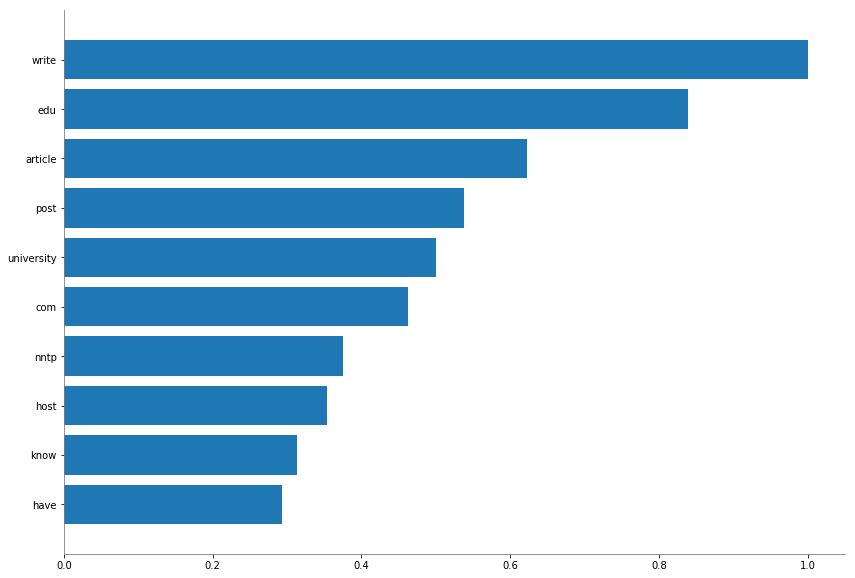

In [7]:
model.varimp_plot()

In [144]:
params = {'max_depth':38,'min_rows':18,'ntrees':335,'sample_rate':0.35,"nfolds":10}
rfmodel = H2ORandomForestEstimator(**params,seed=123)

In [145]:
rfmodel.train(x=vocab,y='target',training_frame=train)

drf Model Build progress: |███████████████████████████████████████████████| 100%


In [146]:
performance2 = rfmodel.model_performance(test)

In [147]:
performance2


ModelMetricsBinomial: drf
** Reported on test data. **

MSE: 0.15272824885324815
RMSE: 0.3908046172363476
LogLoss: 0.4731581266537012
Mean Per-Class Error: 0.2079914729333574
AUC: 0.8747332311849392
AUCPR: 0.9224471035338339
Gini: 0.7494664623698784

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5165927640730777: 


,,0,1,Error,Rate
0,0,1004.0,679.0,0.4034,(679.0/1683.0)
1,1,260.0,2731.0,0.0869,(260.0/2991.0)
2,Total,1264.0,3410.0,0.2009,(939.0/4674.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.516593,0.853304,258.0
1,max f2,0.400983,0.915392,320.0
2,max f0point5,0.655559,0.855439,180.0
3,max accuracy,0.562288,0.809371,232.0
4,max precision,0.978789,1.000000,0.0
5,max recall,0.262596,1.000000,375.0
6,max specificity,0.978789,1.000000,0.0
7,max absolute_mcc,0.562288,0.582547,232.0
8,max min_per_class_accuracy,0.610505,0.790037,207.0
9,max mean_per_class_accuracy,0.589494,0.792009,218.0



Gains/Lift Table: Avg response rate: 63.99 %, avg score: 64.17 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010056,0.953812,1.562688,1.562688,1.000000,0.963038,1.000000,0.963038,0.015714,0.015714,56.268806,56.268806
1,,2,0.020111,0.942640,1.562688,1.562688,1.000000,0.947349,1.000000,0.955194,0.015714,0.031428,56.268806,56.268806
2,,3,0.030167,0.935345,1.562688,1.562688,1.000000,0.939072,1.000000,0.949820,0.015714,0.047141,56.268806,56.268806
3,,4,0.040009,0.927663,1.562688,1.562688,1.000000,0.930883,1.000000,0.945162,0.015379,0.062521,56.268806,56.268806
4,,5,0.050064,0.921238,1.562688,1.562688,1.000000,0.924499,1.000000,0.941012,0.015714,0.078235,56.268806,56.268806
5,,6,0.100128,0.889072,1.529297,1.545993,0.978632,0.905576,0.989316,0.923294,0.076563,0.154798,52.929729,54.599268
6,,7,0.149979,0.854586,1.535861,1.542625,0.982833,0.872188,0.987161,0.906307,0.076563,0.231361,53.586080,54.262502
7,,8,0.200043,0.820721,1.449159,1.519234,0.927350,0.836463,0.972193,0.888827,0.072551,0.303912,44.915944,51.923364
8,,9,0.299957,0.764340,1.422147,1.486894,0.910064,0.792762,0.951498,0.856828,0.142093,0.446005,42.214653,48.689435
9,,10,0.400086,0.708369,1.372361,1.458230,0.878205,0.736564,0.933155,0.826730,0.137412,0.583417,37.236067,45.823031


In [148]:
rfmodel.save_mojo('../objects/20newsgroup/rf_model_2class')

'/mnt/c/Users/Raúl/Documents/Doctorado/curso NLP/FINAL-NLP-COURSE/FINAL_NLP_COURSE/Scripts Phd/oboe/objects/20newsgroup/rf_model_2class/DRF_model_python_1594800800082_10408.zip'

In [8]:
modelo = h2o.upload_mojo('../objects/20newsgroup/rf_model_2class/DRF_model_python_1594800800082_10408.zip')

generic Model Build progress: |███████████████████████████████████████████| 100%
Model Details
H2OGenericEstimator :  Import MOJO Model
Model Key:  Generic_model_python_1599929472018_5


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,335.0,335.0,651922.0,22.0,38.0,32.680595,128.0,167.0,145.6597




ModelMetricsBinomialGeneric: generic
** Reported on train data. **

MSE: 0.1499354016155215
RMSE: 0.38721492948428715
LogLoss: 0.46704362272250355
Mean Per-Class Error: 0.20439070977283746
AUC: 0.8792321746606724
AUCPR: 0.9243397842672894
Gini: 0.7584643493213448

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5211121238001076: 


,,0,1,Error,Rate
0,0,3151.0,1932.0,0.3801,(1932.0/5083.0)
1,1,780.0,8309.0,0.0858,(780.0/9089.0)
2,Total,3931.0,10241.0,0.1914,(2712.0/14172.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.521112,0.859700,247.0
1,max f2,0.399573,0.917570,309.0
2,max f0point5,0.629966,0.859657,188.0
3,max accuracy,0.546898,0.810612,234.0
4,max precision,0.979581,1.000000,0.0
5,max recall,0.242249,1.000000,372.0
6,max specificity,0.979581,1.000000,0.0
7,max absolute_mcc,0.546898,0.580011,234.0
8,max min_per_class_accuracy,0.608595,0.795027,200.0
9,max mean_per_class_accuracy,0.615721,0.795609,196.0



Gains/Lift Table: Avg response rate: 64.13 %, avg score: 64.16 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010020,0.952655,1.559247,1.559247,1.000000,0.961307,1.000000,0.961307,0.015623,0.015623,55.924744,55.924744
1,,2,0.020040,0.941836,1.559247,1.559247,1.000000,0.946802,1.000000,0.954054,0.015623,0.031247,55.924744,55.924744
2,,3,0.030059,0.933695,1.537286,1.551927,0.985915,0.937573,0.995305,0.948560,0.015403,0.046650,53.728621,55.192703
3,,4,0.040008,0.926537,1.559247,1.553747,1.000000,0.929981,0.996473,0.943940,0.015513,0.062163,55.924744,55.374745
4,,5,0.050028,0.918850,1.537286,1.550451,0.985915,0.922696,0.994358,0.939685,0.015403,0.077566,53.728621,55.045056
5,,6,0.100056,0.886168,1.537255,1.543853,0.985896,0.901892,0.990127,0.920788,0.076906,0.154472,53.725524,54.385290
6,,7,0.150014,0.856690,1.515201,1.534311,0.971751,0.871166,0.984008,0.904263,0.075696,0.230168,51.520090,53.431122
7,,8,0.200042,0.827743,1.471279,1.518548,0.943583,0.842047,0.973898,0.888704,0.073605,0.303774,47.127862,51.854751
8,,9,0.300028,0.769503,1.431603,1.489573,0.918137,0.798581,0.955315,0.858670,0.143140,0.446914,43.160263,48.957270
9,,10,0.400014,0.712625,1.341371,1.452529,0.860268,0.741245,0.931558,0.829319,0.134118,0.581032,34.137095,45.252880




ModelMetricsBinomialGeneric: generic
** Reported on cross-validation data. **

MSE: 0.151109755652775
RMSE: 0.3887283828752089
LogLoss: 0.4700852379483748
Mean Per-Class Error: 0.20611437982932546
AUC: 0.8779179797342334
AUCPR: 0.9239145791766864
Gini: 0.7558359594684667

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5231020089378813: 


,,0,1,Error,Rate
0,0,3126.0,1957.0,0.385,(1957.0/5083.0)
1,1,785.0,8304.0,0.0864,(785.0/9089.0)
2,Total,3911.0,10261.0,0.1935,(2742.0/14172.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.523102,0.858295,250.0
1,max f2,0.422297,0.916911,302.0
2,max f0point5,0.630606,0.859173,188.0
3,max accuracy,0.539478,0.808355,241.0
4,max precision,0.977645,1.000000,0.0
5,max recall,0.241250,1.000000,373.0
6,max specificity,0.977645,1.000000,0.0
7,max absolute_mcc,0.569438,0.579248,225.0
8,max min_per_class_accuracy,0.609335,0.791836,201.0
9,max mean_per_class_accuracy,0.630606,0.793886,188.0



Gains/Lift Table: Avg response rate: 64.13 %, avg score: 64.14 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010020,0.950536,1.559247,1.559247,1.000000,0.959595,1.000000,0.959595,0.015623,0.015623,55.924744,55.924744
1,,2,0.020040,0.939447,1.559247,1.559247,1.000000,0.944699,1.000000,0.952147,0.015623,0.031247,55.924744,55.924744
2,,3,0.030059,0.931330,1.537286,1.551927,0.985915,0.935174,0.995305,0.946489,0.015403,0.046650,53.728621,55.192703
3,,4,0.040008,0.923570,1.559247,1.553747,1.000000,0.927685,0.996473,0.941813,0.015513,0.062163,55.924744,55.374745
4,,5,0.050028,0.915693,1.537286,1.550451,0.985915,0.919591,0.994358,0.937362,0.015403,0.077566,53.728621,55.045056
5,,6,0.100056,0.882437,1.537255,1.543853,0.985896,0.898493,0.990127,0.917928,0.076906,0.154472,53.725524,54.385290
6,,7,0.150014,0.853229,1.524010,1.537245,0.977401,0.868173,0.985889,0.901359,0.076136,0.230608,52.401021,53.724489
7,,8,0.200042,0.825256,1.455884,1.516898,0.933709,0.839437,0.972840,0.885873,0.072835,0.303444,45.588407,51.689751
8,,9,0.300028,0.767224,1.427201,1.487006,0.915314,0.795207,0.953669,0.855658,0.142700,0.446144,42.720108,48.700573
9,,10,0.400014,0.710086,1.353475,1.453629,0.868031,0.738588,0.932263,0.826396,0.135328,0.581472,35.347520,45.362899




Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid,cv_6_valid,cv_7_valid,cv_8_valid,cv_9_valid,cv_10_valid
0,accuracy,0.8112468,0.016343715,0.79726815,0.8146582,0.8163822,0.8112813,0.78398234,0.8170068,0.7885154,0.821975,0.8290415,0.8323572
1,auc,0.877993,0.010198138,0.87248623,0.86487097,0.87866694,0.8797681,0.87321496,0.890728,0.86145586,0.8825745,0.88324285,0.89292157
2,aucpr,0.92255604,0.009305606,0.91278255,0.9080782,0.93135804,0.9202986,0.9213209,0.9308791,0.9108162,0.9314689,0.9267109,0.9318471
3,err,0.18875317,0.016343715,0.20273185,0.18534179,0.18361774,0.18871866,0.21601763,0.1829932,0.2114846,0.17802504,0.17095852,0.16764276
4,err_count,267.4,22.525047,282.0,263.0,269.0,271.0,294.0,269.0,302.0,256.0,239.0,229.0
5,f0point5,0.8311961,0.021877354,0.8133087,0.82542694,0.84761906,0.82880163,0.7976925,0.8357544,0.80355436,0.83890057,0.8608991,0.86000437
6,f1,0.8620979,0.011127293,0.84887457,0.8686969,0.8687164,0.8586333,0.8451001,0.8651629,0.84778225,0.87288976,0.87171227,0.8734107
7,f2,0.8958201,0.010550336,0.88769335,0.9167545,0.8908909,0.89069265,0.8984988,0.89671654,0.8971624,0.9097495,0.8828006,0.88724166
8,lift_top_group,1.5603282,0.035679895,1.6080924,1.5525165,1.4918534,1.5937847,1.5918128,1.5654953,1.5849056,1.5314164,1.5328947,1.5505108
9,logloss,0.4701479,0.009531195,0.48146763,0.47629702,0.46069208,0.47739077,0.47669688,0.45980254,0.48280728,0.46286365,0.46328536,0.46017578



See the whole table with table.as_data_frame()

Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error
0,,2020-07-15 16:44:02,4 min 43.996 sec,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,,2020-07-15 16:44:02,4 min 44.088 sec,1.0,0.433659,0.717620,0.762414,0.729126,1.471696,0.277200
2,,2020-07-15 16:44:02,4 min 44.150 sec,2.0,0.425632,0.624669,0.776085,0.783509,1.480098,0.277666
3,,2020-07-15 16:44:02,4 min 44.219 sec,3.0,0.414391,0.543745,0.799331,0.820357,1.520355,0.256424
4,,2020-07-15 16:44:02,4 min 44.286 sec,4.0,0.408961,0.517763,0.811264,0.855538,1.514269,0.244913
5,,2020-07-15 16:44:02,4 min 44.356 sec,5.0,0.405388,0.512728,0.821398,0.873429,1.482921,0.242850
6,,2020-07-15 16:44:02,4 min 44.422 sec,6.0,0.402996,0.495429,0.829201,0.885345,1.537286,0.238264
7,,2020-07-15 16:44:03,4 min 44.497 sec,7.0,0.401713,0.490560,0.832988,0.890230,1.548267,0.236868
8,,2020-07-15 16:44:03,4 min 44.568 sec,8.0,0.399717,0.486971,0.837874,0.895060,1.548267,0.232799
9,,2020-07-15 16:44:03,4 min 44.626 sec,9.0,0.398206,0.484107,0.841573,0.899206,1.537286,0.232924



See the whole table with table.as_data_frame()

Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,write,15415.864258,1.000000,0.101974
1,claim,9369.495117,0.607783,0.061978
2,person,7846.063477,0.508960,0.051901
3,thank,7132.628418,0.462681,0.047181
4,window,6910.420410,0.448267,0.045711
5,article,6191.964355,0.401662,0.040959
6,issue,5743.358398,0.372562,0.037992
7,word,4682.567871,0.303750,0.030975
8,life,4330.883789,0.280937,0.028648
9,think,4013.142334,0.260325,0.026546



See the whole table with table.as_data_frame()



H2OValueError: A variable importances plot is not implemented for this type of model

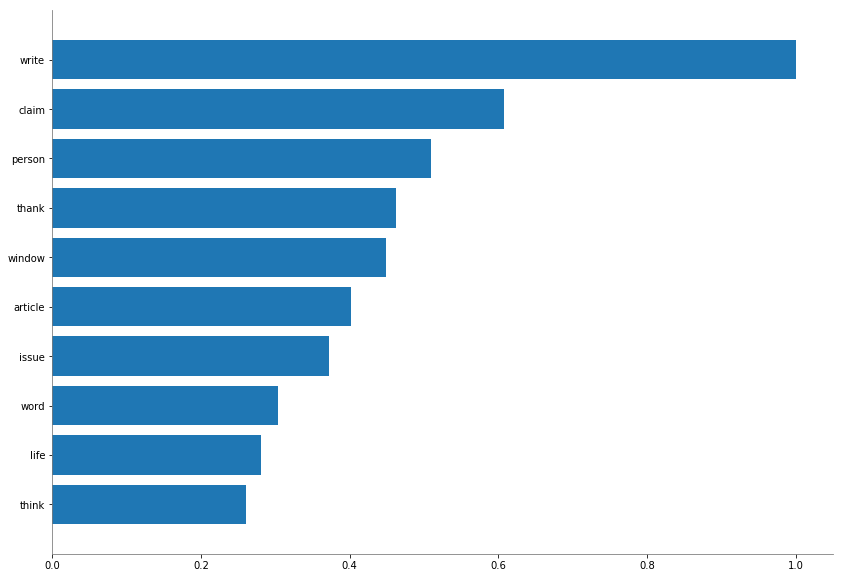

In [9]:
modelo.varimp_plot()

In [ ]:
h2o.shutdown()